<a href="https://colab.research.google.com/github/Jeonwoojae/predict_bitcoin_upbit/blob/main/LSTM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 35.7 MB/s 


In [21]:
import pyupbit
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


def Inseart_data_upbit(coin_select, date_select, countofdata):
	#################################################################################
    date=None
    #res = [pd.DataFrame(columns=['open','high','low', 'close', 'volume', 'value'])]


    res = []
    count = int(countofdata/200)
    for i in range(count):
        df = pyupbit.get_ohlcv(coin_select, interval=date_select, count=200, to=date)
        df['idCoin'] = coin_select    # 마켓 정보 추가

        market_date = df.index
        df['dateCoin'] = market_date    # 날짜 정보 추가
        # 열 이름은 테이블의 이름과 같아야한다.

        df = df[['dateCoin','idCoin', 'open', 'high', 'low', 'close', 'volume', 'value']]     # 데이터 순서 변경
        #print(df)
        res.append(df)

        date = df.index[0]
        time.sleep(0.01)

    df = pd.concat(res).sort_index()
    
    #print(type(df))
    #print(res)
    print(df)
    return df
    ###############################################################################

loaded_data = Inseart_data_upbit('KRW-BTC', 'minute5',50000)
dataset = loaded_data.drop([loaded_data.columns[0], loaded_data.columns[1]], axis=1)
times = dataset.index

                               dateCoin   idCoin        open        high  \
2022-05-20 08:20:00 2022-05-20 08:20:00  KRW-BTC  38831000.0  38856000.0   
2022-05-20 08:25:00 2022-05-20 08:25:00  KRW-BTC  38833000.0  38834000.0   
2022-05-20 08:30:00 2022-05-20 08:30:00  KRW-BTC  38816000.0  38852000.0   
2022-05-20 08:35:00 2022-05-20 08:35:00  KRW-BTC  38851000.0  38868000.0   
2022-05-20 08:40:00 2022-05-20 08:40:00  KRW-BTC  38853000.0  38860000.0   
...                                 ...      ...         ...         ...   
2022-08-08 22:45:00 2022-08-08 22:45:00  KRW-BTC  31844000.0  31890000.0   
2022-08-08 22:50:00 2022-08-08 22:50:00  KRW-BTC  31880000.0  31887000.0   
2022-08-08 22:55:00 2022-08-08 22:55:00  KRW-BTC  31862000.0  31887000.0   
2022-08-08 23:00:00 2022-08-08 23:00:00  KRW-BTC  31861000.0  31861000.0   
2022-08-08 23:05:00 2022-08-08 23:05:00  KRW-BTC  31858000.0  31859000.0   

                            low       close     volume         value  
2022-05-20 08:20

In [22]:
times

DatetimeIndex(['2022-05-20 08:20:00', '2022-05-20 08:25:00',
               '2022-05-20 08:30:00', '2022-05-20 08:35:00',
               '2022-05-20 08:40:00', '2022-05-20 08:45:00',
               '2022-05-20 08:50:00', '2022-05-20 08:55:00',
               '2022-05-20 09:00:00', '2022-05-20 09:05:00',
               ...
               '2022-08-08 22:20:00', '2022-08-08 22:25:00',
               '2022-08-08 22:30:00', '2022-08-08 22:35:00',
               '2022-08-08 22:40:00', '2022-08-08 22:45:00',
               '2022-08-08 22:50:00', '2022-08-08 22:55:00',
               '2022-08-08 23:00:00', '2022-08-08 23:05:00'],
              dtype='datetime64[ns]', length=50000, freq=None)

In [23]:
dataset

,open,high,low,close,volume,value
2022-05-20 08:20:00,38831000.0,38856000.0,38786000.0,38833000.0,11.061527,4.294707e+08
2022-05-20 08:25:00,38833000.0,38834000.0,38728000.0,38815000.0,12.502793,4.849029e+08
2022-05-20 08:30:00,38816000.0,38852000.0,38793000.0,38851000.0,16.893099,6.558325e+08
2022-05-20 08:35:00,38851000.0,38868000.0,38837000.0,38853000.0,8.840419,3.435109e+08
2022-05-20 08:40:00,38853000.0,38860000.0,38768000.0,38851000.0,12.155674,4.718722e+08
...,...,...,...,...,...,...
2022-08-08 22:45:00,31844000.0,31890000.0,31805000.0,31880000.0,59.505660,1.895094e+09
2022-08-08 22:50:00,31880000.0,31887000.0,31861000.0,31861000.0,30.905466,9.849529e+08
2022-08-08 22:55:00,31862000.0,31887000.0,31860000.0,31860000.0,24.712470,7.874939e+08
2022-08-08 23:00:00,31861000.0,31861000.0,31858000.0,31858000.0,18.573383,5.917222e+08


In [24]:
# 3번

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


#plt.rcParams['font.family'] = 'Malgun Gothic'

class My_Lstm:
    def windowed_dataset(self, series, window_size, batch_size, shuffle_buffer):
        series = tf.expand_dims(series, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(series)
        ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(window_size + 1))
        ds = ds.shuffle(shuffle_buffer)
        ds = ds.map(lambda w: (w[:-1], w[1:]))

        return ds.batch(batch_size).prefetch(1)

    def __dataframe_to_series(self, dataframe, col='open'):
        data = dataframe

        return np.asarray(data[col], dtype='float32')

    def scale_data_fit(self, series):
        self.min_scale = np.min(series)
        self.max_scale = np.max(series)

    def scale_data(self, series):
        series = np.array(series)
        series -= self.min_scale
        series /= self.max_scale

        return series

    def un_scale_data(self, series):
        series = np.array(series)
        series *= self.max_scale
        series += self.min_scale

        return series

    def keras_layers_compile(self, loss='mse', optimizer='adam', metrics='mse'):

        self.model = tf.keras.Sequential([
            #tf.keras.layers.LSTM(128, input_shape=[None, 1], return_sequences=True, recurrent_dropout=0.2,dropout=0.2),
            # tf.keras.layers.BatchNormalization(input_shape=[None, 1]),
            
            tf.compat.v1.keras.layers.CuDNNLSTM(64, input_shape=[None, 1], return_sequences=True,),
            tf.keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(128,return_sequences=True,)),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(1)])

        self.model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    def callbacks(self, monitor='loss', mode='min', patience=10):
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 ** (epoch / 10))
        earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='mse', patience=10)
        ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint(self.h5_name, monitor='loss', save_best_only=True)
    
        return [lr_schedule, earlystop, ModelCheckpoint]
        

    def train_data_load(self, dataframe, col='close', scale=True, train_mode=True, window_size=24, batch_size=16,shuffle_buffer=30000,interval='minute10'):
        self.scale = scale
        self.interval = interval

        # Dataframe to series 하나의 컬럼만 가져와서 예측진행
        series = self.__dataframe_to_series(dataframe, col=col)
        self.times = dataframe.index

        # 원본데이터 백업
        self.backup_series = series

        # Scale 진행 MinMax scale

        if train_mode:
            if self.scale:
                self.scale_data_fit(series)
                series = self.scale_data(series)
        else:
            if self.scale:
                self.scale_data_fit(series)

        # Tensorflow 전용 데이터셋으로 변환 (window size=예측할 날짜수)
        self.window_size = window_size

        if train_mode:
            series = self.windowed_dataset(series, self.window_size, batch_size, shuffle_buffer)

            self.series = series
        else:
            self.series = series

    def train_lstm(self,h5_name, epochs=100, callbacks=None, loss='mae', optimizer='adam', metrics='mae', ):

        self.h5_name = h5_name
        # Keras
        self.keras_layers_compile(loss=loss, optimizer=optimizer, metrics=metrics)
        if callbacks:
            callbacks = self.callbacks()
            self.model.fit(self.series, epochs=epochs, callbacks=callbacks)
        else:
            self.model.fit(self.series, epochs=epochs)


    def save_md(self, name):
        try:
            self.model.save(name)
        except:
            print('Error!')

    def model_load(self, name, compile=True):
        if compile:
            self.keras_layers_compile()
            self.model = tf.keras.models.load_model(name)
        else:
            self.model = tf.keras.models.load_model(name)

    def predict(self, times, ranges=[0, 200]):
        predicts = []
        self.ranges = ranges
        # self.backup_series_to_un_scale = self.un_scale_data(self.backup_series[ranges[0]:ranges[1]])

        self.time_series = times[ranges[0]:ranges[1]]

        ranges_series = self.backup_series[ranges[0]:ranges[1]]

        if self.scale:

            ranges_series_scale = self.scale_data(ranges_series)

            for time in range(len(ranges_series_scale) - self.window_size):
                pred = np.array(ranges_series_scale[time: time + self.window_size])

                pred = pred.reshape(1, -1, 1)

                predict = self.model.predict(pred)

                predicts.append(predict[0][0])
            # 수정부분
            predicts = self.un_scale_data(predicts)
        else:

            for time in range(len(ranges_series) - self.window_size):
                pred = np.array(ranges_series[time: time + self.window_size])

                pred = pred.reshape(1, -1, 1)

                predict = self.model.predict(pred)

                predicts.append(predict[0][0])

        return predicts

    def predict_plot(self, predicts):

        plt.figure(figsize=(12, 8))
        plt.plot(self.time_series[:-self.window_size], predicts, color='red', label='Predict')
        plt.plot(self.time_series[:-self.window_size],
                 self.backup_series[self.ranges[0]:self.ranges[1] - self.window_size], color='blue', label='Real')
        plt.legend(loc='center left')
        plt.show()

    def predict_last_few(self, future_, minutes=10):

        _last_future_series = self.backup_series[-self.window_size:]

        self.pred_times = self.times[-self.window_size:]
        self.pred_times = self.pred_times.to_list()

        self.future_ = future_
        futures = []

        if self.scale:

            _last_future_series = self.scale_data(_last_future_series)

            for time in range(future_):
                pred = np.array(_last_future_series, dtype='float64')

                pred = pred.reshape(1, -1, 1)

                predict = self.model.predict(pred)

                _last_future_series = np.append(_last_future_series, predict[0][0])

                futures.append(predict[0][0])

                # 시간도 동일하게 추가 및 제거
                self.pred_times.append(self.pred_times[-1] + timedelta(minutes=minutes))  # 추후 변경예정
                self.pred_times.pop(0)

                _last_future_series = np.delete(_last_future_series, 0)

            futures = self.un_scale_data(futures)
            _last_future_series = self.un_scale_data(_last_future_series)
            # Test
            #_last_future_series[-self.future_:] -= 182.35088730159788 

        else:

            for time in range(future_):
                pred = np.array(_last_future_series, dtype='float64')

                pred = pred.reshape(1, -1, 1)

                predict = self.model.predict(pred)

                _last_future_series = np.append(_last_future_series, predict[0][0])
                futures.append(predict[0][0])

                # 시간도 동일하게 추가 및 제거
                self.pred_times.append(self.pred_times[-1] + timedelta(minutes=minutes))  # 추후 변경예정
                self.pred_times.pop(0)

                _last_future_series = np.delete(_last_future_series, 0)

        self.futures = futures
        self._last_future_series = _last_future_series

        self.pred_times = pd.DatetimeIndex(self.pred_times)

    def plot_few_(self, coinid):
        threshold = np.ones_like(self._last_future_series, dtype=bool)
        threshold[:-self.future_] = False

        pred_y = self._last_future_series

        plt.plot(self.pred_times, pred_y, color='blue', label='Real')
        plt.plot(self.pred_times[threshold], pred_y[threshold], color='red', label='Predict')
        plt.title(f"{coinid} {self.interval} {self.future_}개 예측결과")
        plt.legend(loc='center left')
        plt.show()

In [25]:
# 예측할 코인 ID
coinid = 'BTC'

# 시작가 or 종료가
col = 'close'

# 분봉 단위 및 day단위
interval = 'minute5'

# API를 통해서 가져올 데이터의 수
rows = 50000

In [26]:
# 훈련횟수
epochs = 100
# 예측 1개에 사용할 갯수
window_size = 12
# 훈련시 학습에 사용할 데이터의 집합 크기
batch_size = 12
# random(데이터의 수 보다 커야함)
shuffle_buffer = 60000

mylstm = My_Lstm()

In [27]:
# 학습전 셋팅 진행
mylstm.train_data_load(dataset,col=col,scale=True,train_mode=True, interval=interval,window_size=window_size,batch_size=batch_size,shuffle_buffer=shuffle_buffer)

In [28]:
# start training
h5_name = f"{coinid}_win:{window_size}_epoch:{epochs}_batch:{batch_size}_interval:{interval}_{int(mylstm.max_scale)}_{int(mylstm.min_scale)}.h5"
mylstm.train_lstm(loss = 'mse',metrics = 'mse',epochs = epochs,callbacks = 'go',h5_name = h5_name)

Epoch 1/100
4166/4166 [==============================] - 39s 7ms/step - loss: 0.0405 - mse: 0.0405 - lr: 1.0000e-08
Epoch 2/100
4166/4166 [==============================] - 31s 7ms/step - loss: 0.0382 - mse: 0.0382 - lr: 1.2589e-08
Epoch 3/100
4166/4166 [==============================] - 31s 7ms/step - loss: 0.0355 - mse: 0.0355 - lr: 1.5849e-08
Epoch 4/100
4166/4166 [==============================] - 32s 7ms/step - loss: 0.0322 - mse: 0.0322 - lr: 1.9953e-08
Epoch 5/100
4166/4166 [==============================] - 31s 7ms/step - loss: 0.0283 - mse: 0.0283 - lr: 2.5119e-08
Epoch 6/100
4166/4166 [==============================] - 31s 7ms/step - loss: 0.0239 - mse: 0.0239 - lr: 3.1623e-08
Epoch 7/100
4166/4166 [==============================] - 31s 7ms/step - loss: 0.0189 - mse: 0.0189 - lr: 3.9811e-08
Epoch 8/100
4166/4166 [==============================] - 32s 7ms/step - loss: 0.0137 - mse: 0.0137 - lr: 5.0119e-08
Epoch 9/100
4166/4166 [==============================] - 31s 7ms/step - 

In [29]:
pred1 = mylstm.predict(times,ranges=[48000,50000])

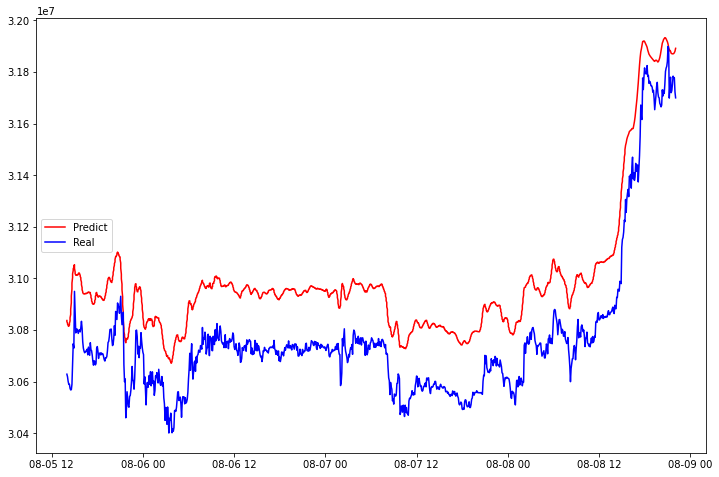

In [30]:
mylstm.predict_plot(pred1)

#Test (학습된 모델로 바로 예측하기)

In [31]:
mylstm2 = My_Lstm()

In [32]:
# 가중치 로드
mylstm2.model_load(h5_name,compile=False,)

In [33]:
# 예측할 코인 ID
coinid = 'ZRX'

# 시작가 or 종료가
col = 'close'

# 분봉 단위 및 day단위
interval = 'minute10'

# API를 통해서 가져올 데이터의 수
rows = 1000

In [34]:
# 데이터 가져오기 위에서 지정한 변수로 입력값 바꿔야함
loaded_data = Inseart_data_upbit('KRW-ZRX', 'minute5',1000)
dataset = loaded_data.drop([loaded_data.columns[0], loaded_data.columns[1]], axis=1)
times = dataset.index

                               dateCoin   idCoin   open   high    low  close  \
2022-08-06 21:40:00 2022-08-06 21:40:00  KRW-ZRX  475.0  476.0  475.0  476.0   
2022-08-06 21:45:00 2022-08-06 21:45:00  KRW-ZRX  475.0  475.0  475.0  475.0   
2022-08-06 21:50:00 2022-08-06 21:50:00  KRW-ZRX  474.0  475.0  474.0  474.0   
2022-08-06 21:55:00 2022-08-06 21:55:00  KRW-ZRX  475.0  475.0  474.0  474.0   
2022-08-06 22:00:00 2022-08-06 22:00:00  KRW-ZRX  475.0  475.0  474.0  474.0   
...                                 ...      ...    ...    ...    ...    ...   
2022-08-08 23:30:00 2022-08-08 23:30:00  KRW-ZRX  483.0  484.0  483.0  483.0   
2022-08-08 23:35:00 2022-08-08 23:35:00  KRW-ZRX  483.0  483.0  483.0  483.0   
2022-08-08 23:40:00 2022-08-08 23:40:00  KRW-ZRX  483.0  484.0  483.0  484.0   
2022-08-08 23:45:00 2022-08-08 23:45:00  KRW-ZRX  484.0  485.0  483.0  484.0   
2022-08-08 23:50:00 2022-08-08 23:50:00  KRW-ZRX  484.0  484.0  483.0  484.0   

                           volume      

In [35]:
# 예측전 모델 셋팅
mylstm2.train_data_load(dataset,col=col,scale=True,train_mode=False,interval='minute10')

In [36]:
# 5개만 예측 ex.(10분봉 5개)
mylstm2.predict_last_few(5,minutes=10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_

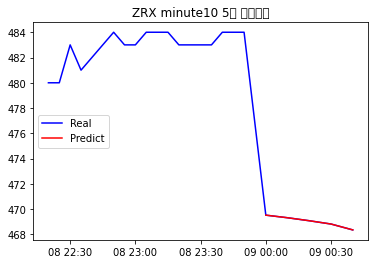

In [37]:
# 예측결과 plot으로 반환
mylstm2.plot_few_(coinid=coinid)

In [38]:
mylstm2._last_future_series

array([480.     , 480.     , 483.     , 481.     , 482.     , 483.     ,
       484.     , 483.     , 483.     , 484.     , 484.     , 484.     ,
       483.     , 483.     , 483.     , 483.     , 484.     , 484.     ,
       484.     , 469.52313, 469.31763, 469.08096, 468.82004, 468.3547 ],
      dtype=float32)

In [39]:
mylstm2.pred_times

DatetimeIndex(['2022-08-08 22:20:00', '2022-08-08 22:25:00',
               '2022-08-08 22:30:00', '2022-08-08 22:35:00',
               '2022-08-08 22:40:00', '2022-08-08 22:45:00',
               '2022-08-08 22:50:00', '2022-08-08 22:55:00',
               '2022-08-08 23:00:00', '2022-08-08 23:05:00',
               '2022-08-08 23:10:00', '2022-08-08 23:15:00',
               '2022-08-08 23:20:00', '2022-08-08 23:25:00',
               '2022-08-08 23:30:00', '2022-08-08 23:35:00',
               '2022-08-08 23:40:00', '2022-08-08 23:45:00',
               '2022-08-08 23:50:00', '2022-08-09 00:00:00',
               '2022-08-09 00:10:00', '2022-08-09 00:20:00',
               '2022-08-09 00:30:00', '2022-08-09 00:40:00'],
              dtype='datetime64[ns]', freq=None)